In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torch.nn import functional as F
from torch import optim

In [2]:
batch_size = 128
trans = transforms.ToTensor()

In [3]:
# datasets 
cifar_train = datasets.CIFAR10(root='data', 
                               train=True, 
                               transform=transforms.Compose([transforms.Resize((32,32)), 
                                                             trans]), 
                               download=True)

cifar_train = DataLoader(cifar_train, batch_size=batch_size, shuffle=True)

cifar_test = datasets.CIFAR10(root='data', 
                               train=False, 
                               transform=transforms.Compose([transforms.Resize((32,32)), 
                                                             trans]), 
                               download=True)
cifar_test = DataLoader(cifar_test, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
x, label = iter(cifar_train).next()
print('x:', x.shape, 'label:', label.shape)

x: torch.Size([128, 3, 32, 32]) label: torch.Size([128])


In [5]:
device = torch.device('cuda')

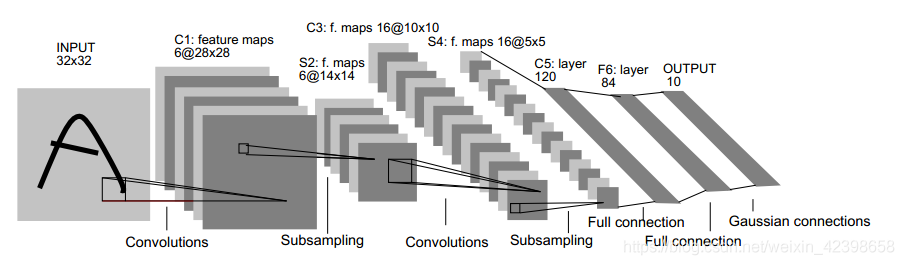

In [6]:
# network model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        # [b,3,32,32]->[b,6,28,28]->[b,6,14,14]->[b,16,10,10]->[b,16,5,5]->[b,120]
        self.conv_unit = nn.Sequential(nn.Conv2d(3,6,kernel_size=5,stride=1,padding=0), 
                                       nn.MaxPool2d(kernel_size=2,stride=2,padding=0), 
                                       nn.Conv2d(6,16,kernel_size=5,stride=1,padding=0), 
                                       nn.MaxPool2d(kernel_size=2,stride=2,padding=0))
        # flatten
        self.fc_unit = nn.Sequential(nn.Linear(16*5*5,120),  
                                     nn.ReLU(), 
                                     nn.Linear(120,84), 
                                     nn.ReLU(), 
                                     nn.Linear(84, 10))
    def forward(self, x):
        
        batchsz = x.size(0)
        
        x = self.conv_unit(x)
        x = x.reshape(batchsz, 16*5*5)
        logits = self.fc_unit(x)
        
        return logits

In [7]:
model = LeNet5().to(device)

In [12]:
loss_fn = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [13]:
print(model)

LeNet5(
  (conv_unit): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_unit): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [10]:
epochs = 1000

In [15]:
# train
for epoch in range(epochs):
    
    model.train()  # train
    for batch_idx, (x, label) in enumerate(cifar_train):
        
        x, label = x.to(device), label.to(device)
        y_hat = model(x)
        
        loss = loss_fn(y_hat, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(epoch, 'loss: ',loss.item())
    
    model.eval()   # test
    with torch.no_grad():
        total_correct = 0
        total_num = 0
        
        for x, label in cifar_test:
            x, label = x.to(device), label.to(device)
            logits = model(x)
            
            pred = logits.argmax(dim=1)
            correct = torch.eq(pred,label).float().sum().item()
            total_correct += correct
            total_num += x.size(0)
        acc = total_correct / total_num
        print(epoch, 'test acc: ', acc)

0 loss:  1.4999831914901733
0 test acc:  0.4893
1 loss:  1.1749929189682007
1 test acc:  0.5357
2 loss:  1.5225181579589844
2 test acc:  0.5482
3 loss:  1.1758854389190674
3 test acc:  0.5692
4 loss:  1.1496028900146484
4 test acc:  0.5811
5 loss:  1.2969269752502441
5 test acc:  0.5895
6 loss:  1.0562344789505005
6 test acc:  0.6069
7 loss:  0.9472209215164185
7 test acc:  0.5963
8 loss:  1.0100454092025757
8 test acc:  0.6079
9 loss:  1.0022345781326294
9 test acc:  0.6032
10 loss:  0.7917791604995728
10 test acc:  0.619
11 loss:  0.7299405336380005
11 test acc:  0.6199
12 loss:  0.9141255617141724
12 test acc:  0.6257
13 loss:  0.6627156734466553
13 test acc:  0.6272
14 loss:  0.899581253528595
14 test acc:  0.6233
15 loss:  0.701801061630249
15 test acc:  0.6267
16 loss:  0.7207010984420776
16 test acc:  0.622
17 loss:  0.9503908157348633
17 test acc:  0.6209
18 loss:  0.65953129529953
18 test acc:  0.6346
19 loss:  0.7153726816177368
19 test acc:  0.629
20 loss:  0.556689441204071

160 test acc:  0.5777
161 loss:  0.048129189759492874
161 test acc:  0.5823
162 loss:  0.22085055708885193
162 test acc:  0.5818
163 loss:  0.15509311854839325
163 test acc:  0.5823
164 loss:  0.08657349646091461
164 test acc:  0.5808
165 loss:  0.0329347662627697
165 test acc:  0.5772
166 loss:  0.12470275163650513
166 test acc:  0.5787
167 loss:  0.11899261176586151
167 test acc:  0.5819
168 loss:  0.18924608826637268
168 test acc:  0.5797
169 loss:  0.03822988644242287
169 test acc:  0.5836
170 loss:  0.08155639469623566
170 test acc:  0.5815
171 loss:  0.241855189204216
171 test acc:  0.5824
172 loss:  0.1072993054986
172 test acc:  0.5803
173 loss:  0.10338606685400009
173 test acc:  0.5755
174 loss:  0.11660777032375336
174 test acc:  0.5756
175 loss:  0.050284795463085175
175 test acc:  0.5836
176 loss:  0.2582167983055115
176 test acc:  0.5817
177 loss:  0.035907160490751266
177 test acc:  0.5823
178 loss:  0.03287441283464432
178 test acc:  0.5832
179 loss:  0.0308965202420949

315 test acc:  0.5696
316 loss:  0.059313543140888214
316 test acc:  0.5753
317 loss:  0.023706432431936264
317 test acc:  0.5728
318 loss:  0.10164288431406021
318 test acc:  0.5759
319 loss:  0.03437428176403046
319 test acc:  0.5772
320 loss:  0.09498529136180878
320 test acc:  0.5753
321 loss:  0.12085604667663574
321 test acc:  0.5713
322 loss:  0.048951972275972366
322 test acc:  0.5779
323 loss:  0.07378513365983963
323 test acc:  0.5813
324 loss:  0.27267807722091675
324 test acc:  0.5711
325 loss:  0.03640293329954147
325 test acc:  0.5675
326 loss:  0.04167177155613899
326 test acc:  0.5756
327 loss:  0.009734690189361572
327 test acc:  0.5749
328 loss:  0.01293115597218275
328 test acc:  0.5751
329 loss:  0.08176389336585999
329 test acc:  0.5715
330 loss:  0.012741324491798878
330 test acc:  0.5779
331 loss:  0.008535169064998627
331 test acc:  0.5714
332 loss:  0.06503454595804214
332 test acc:  0.5732
333 loss:  0.018622377887368202
333 test acc:  0.572
334 loss:  0.03898

469 test acc:  0.5708
470 loss:  0.016700664535164833
470 test acc:  0.5732
471 loss:  0.013361838646233082
471 test acc:  0.5754
472 loss:  0.03042297437787056
472 test acc:  0.5645
473 loss:  0.0002184148906962946
473 test acc:  0.5724
474 loss:  0.07198825478553772
474 test acc:  0.5696
475 loss:  0.04733831807971001
475 test acc:  0.5754
476 loss:  0.09165431559085846
476 test acc:  0.5707
477 loss:  0.0024543229956179857
477 test acc:  0.5752
478 loss:  0.024233946576714516
478 test acc:  0.5711
479 loss:  0.011110699735581875
479 test acc:  0.5799
480 loss:  0.0015048009809106588
480 test acc:  0.5733
481 loss:  0.06414665281772614
481 test acc:  0.5694
482 loss:  0.040979065001010895
482 test acc:  0.5742
483 loss:  0.1211688295006752
483 test acc:  0.5727
484 loss:  0.020945515483617783
484 test acc:  0.5731
485 loss:  0.08100893348455429
485 test acc:  0.5701
486 loss:  0.1297377198934555
486 test acc:  0.5758
487 loss:  0.0034362096339464188
487 test acc:  0.5693
488 loss:  0

623 test acc:  0.5725
624 loss:  0.23912963271141052
624 test acc:  0.5731
625 loss:  0.0071319774724543095
625 test acc:  0.5726
626 loss:  0.08501017838716507
626 test acc:  0.5772
627 loss:  0.06187617778778076
627 test acc:  0.5798
628 loss:  0.00759063009172678
628 test acc:  0.5742
629 loss:  0.09349247813224792
629 test acc:  0.5732
630 loss:  0.031189005821943283
630 test acc:  0.5758
631 loss:  0.04094887152314186
631 test acc:  0.5721
632 loss:  0.24846263229846954
632 test acc:  0.5745
633 loss:  0.03735608980059624
633 test acc:  0.5748
634 loss:  0.006515061017125845
634 test acc:  0.571
635 loss:  0.14533033967018127
635 test acc:  0.57
636 loss:  0.11229437589645386
636 test acc:  0.5701
637 loss:  0.0037952668499201536
637 test acc:  0.5712
638 loss:  0.06521125882863998
638 test acc:  0.5731
639 loss:  0.15092238783836365
639 test acc:  0.5761
640 loss:  0.006135105155408382
640 test acc:  0.5744
641 loss:  0.15259775519371033
641 test acc:  0.5747
642 loss:  0.1311506

776 test acc:  0.5721
777 loss:  0.154707670211792
777 test acc:  0.5687
778 loss:  0.0005419485969468951
778 test acc:  0.5705
779 loss:  0.2565837502479553
779 test acc:  0.5739
780 loss:  0.012100161984562874
780 test acc:  0.5711
781 loss:  0.0010818217415362597
781 test acc:  0.5687
782 loss:  0.1689017415046692
782 test acc:  0.573
783 loss:  0.000634194235317409
783 test acc:  0.5704
784 loss:  0.2690395712852478
784 test acc:  0.5698
785 loss:  0.0001999943342525512
785 test acc:  0.5715
786 loss:  0.0006836981046944857
786 test acc:  0.5715
787 loss:  0.00024241865321528167
787 test acc:  0.5765
788 loss:  0.13370683789253235
788 test acc:  0.5772
789 loss:  0.00048170596710406244
789 test acc:  0.5669
790 loss:  0.0732973963022232
790 test acc:  0.5711
791 loss:  0.14700213074684143
791 test acc:  0.5692
792 loss:  0.005689034704118967
792 test acc:  0.567
793 loss:  0.019994530826807022
793 test acc:  0.5683
794 loss:  0.09610365331172943
794 test acc:  0.5728
795 loss:  0.0

930 loss:  0.1427076756954193
930 test acc:  0.5752
931 loss:  0.0697486624121666
931 test acc:  0.568
932 loss:  0.02546938881278038
932 test acc:  0.5705
933 loss:  0.028182219713926315
933 test acc:  0.567
934 loss:  0.002924337750300765
934 test acc:  0.5689
935 loss:  0.04112166911363602
935 test acc:  0.5764
936 loss:  0.008610163815319538
936 test acc:  0.5704
937 loss:  0.024407263845205307
937 test acc:  0.5701
938 loss:  0.0006392834475263953
938 test acc:  0.5673
939 loss:  0.0746227353811264
939 test acc:  0.5718
940 loss:  0.03131547197699547
940 test acc:  0.5706
941 loss:  0.05977313965559006
941 test acc:  0.571
942 loss:  0.06323257833719254
942 test acc:  0.5669
943 loss:  0.0060729822143912315
943 test acc:  0.568
944 loss:  0.006383981555700302
944 test acc:  0.5734
945 loss:  0.13558752834796906
945 test acc:  0.5736
946 loss:  0.12768320739269257
946 test acc:  0.5709
947 loss:  0.00037835564580745995
947 test acc:  0.5622
948 loss:  0.04794967174530029
948 test a